# ANCHAL SHARMA
## TASK-1

____

IMPORTING ALL <span style="color:orange">LIBRARIES</span> REQUIRED

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

IMPORTING <span style='color:orange'>DATA</span>

In [2]:
path='http://bit.ly/w-data'
Pct=pd.read_csv('http://bit.ly/w-data')

DATA <span style='color:orange'>UNDERSTANDING</span>

In [3]:
Pct.shape

(25, 2)

In [4]:
Pct.describe().T

,count,mean,std,min,25%,50%,75%,max
Hours,25.0,5.012,2.525094,1.1,2.7,4.8,7.4,9.2
Scores,25.0,51.480,25.286887,17.0,30.0,47.0,75.0,95.0


In [5]:
Pct.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [6]:
print(Pct.head())
print(Pct.tail())

   Hours  Scores
0    2.5      21
1    5.1      47
2    3.2      27
3    8.5      75
4    3.5      30
    Hours  Scores
20    2.7      30
21    4.8      54
22    3.8      35
23    6.9      76
24    7.8      86


In [7]:
Pct.size

50

CHECKING FOR <span style='color:orange'>MISSING VALUE</span>

In [8]:
Pct.isnull().sum()

Hours     0
Scores    0
dtype: int64

DATA <span style='color:orange'>VISUALIZATION</span>

**SCATTER PLOT**

Text(0.5, 1.0, 'Hours vs Percentage')

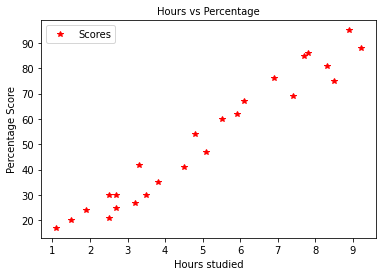

In [12]:
Pct.plot(x='Hours',y='Scores',style='*',color='red')
plt.xlabel('Hours studied')
plt.ylabel('Percentage Score')
plt.title('Hours vs Percentage',fontsize=10)

Text(0.5, 1.0, 'Distribution of percentage Scores')

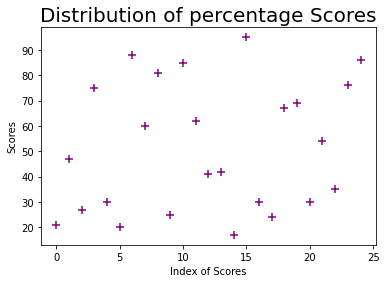

In [13]:

x=Pct.Scores.index
y=Pct.Scores
plt.scatter(x=Pct.Scores.index,y=Pct.Scores,c='purple',s=50,marker="+",)
plt.xlabel('Index of Scores')
plt.ylabel('Scores')
plt.title('Distribution of percentage Scores',fontsize=20)

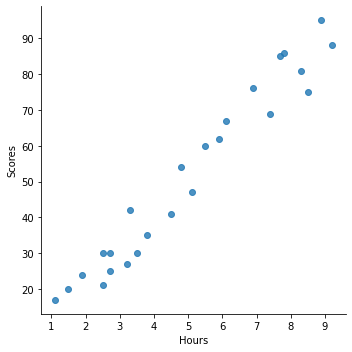

In [14]:
#Using seaborn
sns.lmplot(x='Hours',y='Scores',data=Pct,fit_reg=False)

**BOX PLOT**

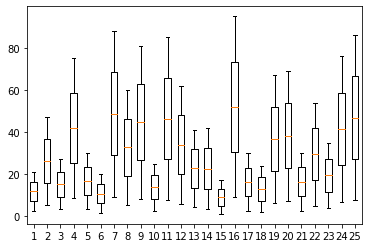

In [15]:
plt.boxplot(Pct)
plt.show()

Text(0, 0.5, 'Scores obtained')

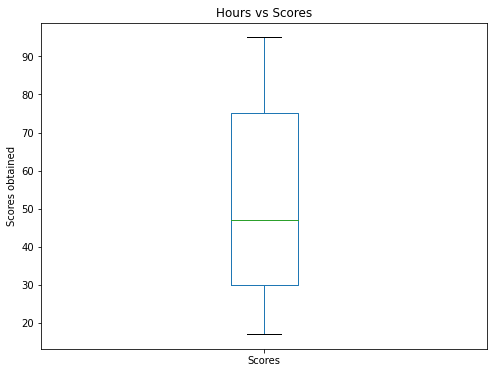

In [16]:
pct_scored=Pct['Scores']
pct_scored.plot(kind='box',figsize=(8,6))
plt.title('Hours vs Scores')
plt.ylabel('Scores obtained')

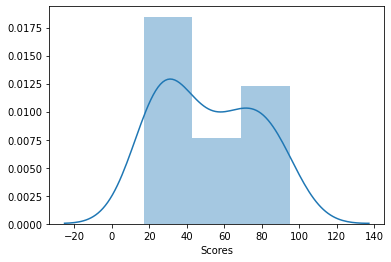

In [17]:
#using seaborn
sns.distplot(Pct['Scores'])

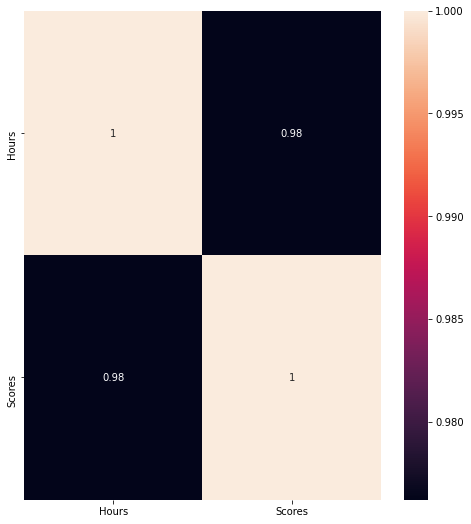

In [18]:
corre=Pct.corr()
plt.figure(figsize=(8,9))
sns.heatmap(data=corre,annot=True)

**LINEAR REGRESSION**

DATA <span style='color:orange'> PREPARATION </span>

In [19]:
X=Pct.iloc[:,:-1].values
Y=Pct.iloc[:,1].values

In [20]:
#Divide the dataset into training and testing
from sklearn.model_selection import train_test_split
X_train , X_test , Y_train , Y_test= train_test_split(X,Y,test_size=0.2,random_state=4)

<span style='color:orange'>TRAINING</span>

In [21]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(X_train,Y_train)

LinearRegression()

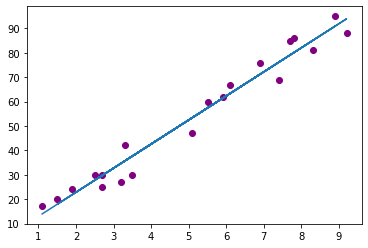

In [22]:
#Plotting regression line for training
line = regressor.coef_*X_train+regressor.intercept_
plt.scatter(X_train,Y_train,color='purple',marker='o')
plt.plot(X_train,line)

<span style='color:orange'>PREDICTIONS</span>

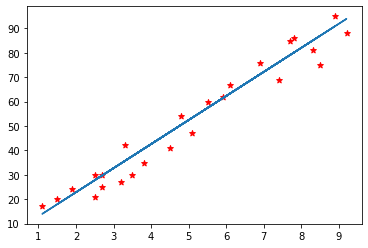

In [23]:
y_pred=regressor.predict(X_test)

#Plotting regression line for testing
line = regressor.coef_*X+regressor.intercept_
plt.scatter(X,Y,color='red',marker='*')
plt.plot(X,line)

In [24]:
#comparing the Actual vs Predicted
Data=pd.DataFrame({'Actual':Y_test,'Predicted':y_pred})
Data

,Actual,Predicted
0,35,40.604168
1,54,50.481812
2,21,27.763230
3,75,87.029097
4,41,47.518519


**ACCURACY**

In [25]:
from sklearn import metrics
metrics.r2_score(Y_test,y_pred)

0.8345792140066828

In [26]:
mse=print('Mean absolute error=',metrics.mean_absolute_error(Y_test,y_pred))
rootsqe=print('Root mean squared error=',np.sqrt(metrics.mean_squared_error(Y_test,y_pred)))

Mean absolute error= 6.8866403471761775
Root mean squared error= 7.43929957468606


**SCORE PREDICTIONS**

In [27]:
pred_score=print('Predicted score for a student studying 9.25 hours per day is:',regressor.predict([[9.25]]))

Predicted score for a student studying 9.25 hours per day is: [94.43733048]
